In [105]:
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from ast import literal_eval


In [106]:
path = pathlib.Path(r'data\presolves\cartpole_DIRCOL_10000.csv')
df = pd.read_csv(path)

In [107]:
df.head()

,params,X,U,obj,solve_time_sec,term_status
0,"[0.10424275910707662, 0.9217538991461435]","[[0.10424275910707662, 0.9217538991461435, 0.0...","[[7.326610499765602], [4.745690213307164], [2....",450.375348,3.999531,LOCALLY_SOLVED
1,"[0.17817573961855623, 0.29987554159020713]","[[0.17817573961855623, 0.29987554159020713, 0....","[[4.6724625169592535], [3.7593752777151], [3.2...",403.572057,0.700773,LOCALLY_SOLVED
2,"[0.10513247830840947, 0.6135346283367087]","[[0.10513247830840947, 0.6135346283367087, 0.0...","[[6.3690377463781545], [3.9725025998352463], [...",421.742152,0.961981,LOCALLY_SOLVED
3,"[0.008963601003498222, 1.4661079152569128]","[[0.008963601003498222, 1.4661079152569128, 0....","[[8.639131496029902], [7.8547709044225815], [6...",519.163244,0.438090,LOCALLY_SOLVED
4,"[0.11611199637490824, 0.5140240587239221]","[[0.11611199637490824, 0.5140240587239221, -2....","[[5.596124384818753], [3.6110816163085557], [2...",414.549059,0.690741,LOCALLY_SOLVED


## Visualize Convergence

In [108]:
df['term_status']

# Import dataset and convert string lists into np arrays
array_elements = ['params', 'X', 'U']
for elem in array_elements:
    df[elem] = df[elem].apply(literal_eval) # Convert strings into lists 
    df[elem] = df[elem].apply(lambda x: np.array(x, dtype=np.float64)) # Convert lists into np arrays of type np.float64


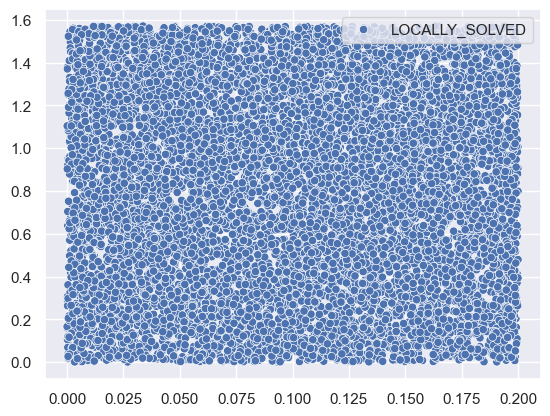

In [109]:

# df_small = df.head(1000)
params = df['params'].to_numpy()
# print(params)
params = np.vstack(params)
# print(params)


sns.set_theme()
sns.scatterplot(x=params[:, 0], y=params[:, 1], style=df['term_status'], hue=df['term_status'])

# plt.scatter(params[:, 0], params[:, 1])
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot')
# plt.show()
plt.legend(loc='upper right')

## Visualize Value Function

<Axes: >

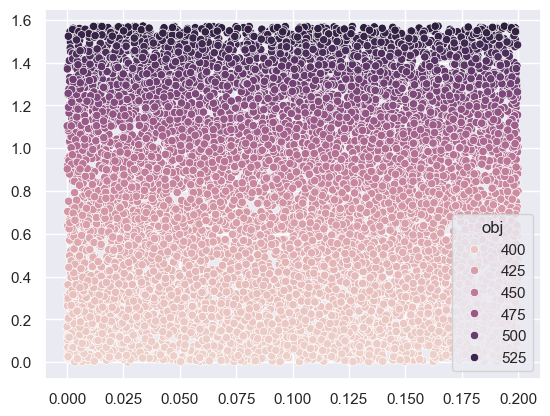

In [110]:
sns.scatterplot(x=params[:, 0], y=params[:, 1], hue=df['obj'])
